In [79]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Importing necessary sklearn classes
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss, confusion_matrix, roc_auc_score
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Importing my own regression model
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
if 'utils.MyRegression' in sys.modules:
    del sys.modules['utils.MyRegression']
from utils.MyRegression import MyRegression

## Linear Regression for Regression Tasks

In [134]:
# Importing DataSet for testing Regression Model
data = load_diabetes()
X = data.data
y = data.target

# Preprocessing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

L1: 0, L2: 0.
MSE Train: 2827.0268459184995
MSE Test: 3138.681965112823


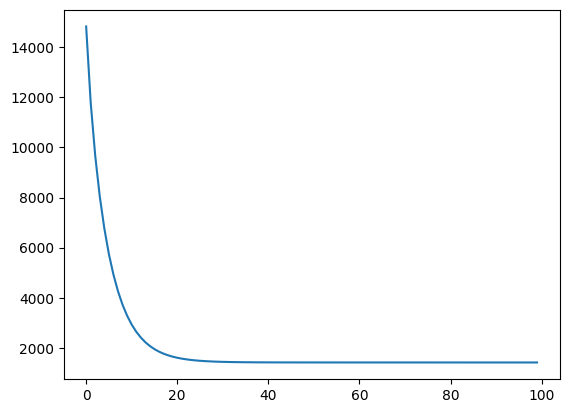

L1: 1, L2: 0.
MSE Train: 2838.1995754411555
MSE Test: 3099.859293006133


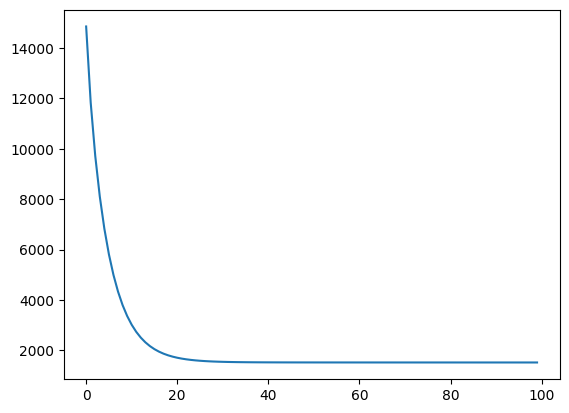

L1: 0, L2: 1.
MSE Train: 3224.386931478525
MSE Test: 3327.7091030301126


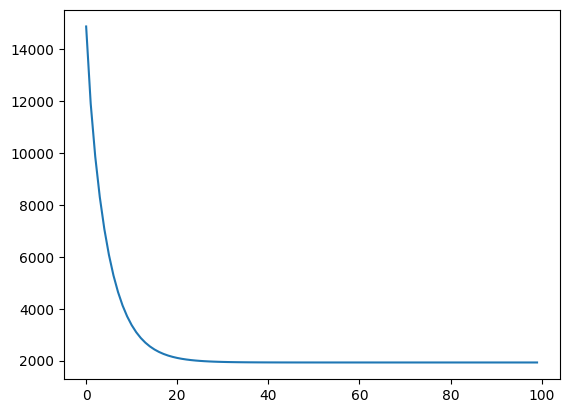

In [136]:
my_linear_model = MyRegression(max_iter=100)
my_lasso_model = MyRegression(l1_ratio=1, max_iter=100)
my_ridge_model = MyRegression(l2_ratio=1, max_iter=100)

for model in [my_linear_model, my_lasso_model, my_ridge_model]:
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_pred = model.predict(X_test_scaled)

    print(f'L1: {model.l1_ratio}, L2: {model.l2_ratio}.\nMSE Train: {mean_squared_error(y_train, y_train_pred)}\nMSE Test: {mean_squared_error(y_test, y_pred)}')

    plt.plot(model.loss_values_)
    plt.show()

## Logistic Regression for Classification Tasks

In [138]:
# Importing DataSet for testing Classification Model
clssification_data = load_breast_cancer()
X = clssification_data.data
y = clssification_data.target
# Preprocessing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Log-Loss Train: 0.09033798764583928, ROC-AUC Train: 0.9970554320072481
Log-Loss Test: 0.09282052518591602, ROC-AUC Test: 0.9909789508853992


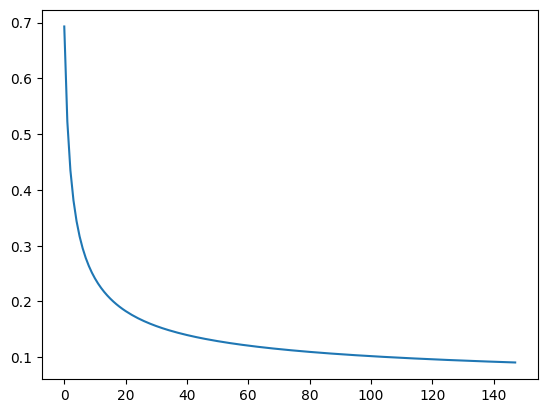

In [139]:
model = MyRegression(type='logistic')

model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print(f'Log-Loss Train: {log_loss(y_train, y_train_pred)}, ROC-AUC Train: {roc_auc_score(y_train, y_train_pred)}\nLog-Loss Test: {log_loss(y_test, y_pred)}, ROC-AUC Test: {roc_auc_score(y_test, y_pred)}')

plt.plot(model.loss_values_)
plt.show()